# Visualizing earnings based on college majors

*In this project, I will work with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.*

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. **FiveThirtyEight** cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

*The aim of this project is to clean the data and learn how to analyze a dataset using the right tool from matplolib, jointly with pandas.*

![Image](https://matplotlib.org/_static/logo2_compressed.svg)

## Introduction

***


Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- **`Rank`** - Rank by median earnings (the dataset is ordered by this column).
- **`Major_code`** - Major code.
- **`Major`** - Major description.
- **`Major_category`** - Category of major.
- **`Total`** - Total number of people with major.
- **`Sample_size`** - Sample size (unweighted) of full-time.
- **`Men`** - Male graduates.
- **`Women`** - Female graduates.
- **`ShareWomen`** - Women as share of total.
- **`Employed`** - Number employed.
- **`Median`** - Median salary of full-time, year-round workers.
- **`Low_wage_jobs`** - Number in low-wage service jobs.
- **`Full_time`** - Number employed 35 hours or more.
- **`Part_time`** - Number employed less than 35 hours.

Using visualizations with the right plots, we are able to explore questions from the dataset such as:

- Do students that majored in subjects that were majority female make more money?    
- Is there any link between the number of full-time employees and median salary?
- What percent of majors are predominantly male?
- What's the most common median salary range?
- Is there a correlation between the median salary of full-time and the unemployment rate of a major ? *(classic [insiders vs. outsiders](https://en.wikipedia.org/wiki/Insider-outsider_theory_of_employment) economic analysis)*

## Opening and discovering the dataset

***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

print(recent_grads.shape)
recent_grads.head(3)

(173, 21)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [2]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
recent_grads.count()

Rank                    173
Major_code              173
Major                   173
Total                   172
Men                     172
Women                   172
Major_category          173
ShareWomen              172
Sample_size             173
Employed                173
Full_time               173
Part_time               173
Full_time_year_round    173
Unemployed              173
Unemployment_rate       173
Median                  173
P25th                   173
P75th                   173
College_jobs            173
Non_college_jobs        173
Low_wage_jobs           173
dtype: int64

In [5]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

**Observations :** Matplotlib expects that columns of values we pass in have matching lengths. That is why missing values would cause matplotlib to throw errors.

***Therefore we drop rows with missing values before analysing our questions***

In [6]:
recent_grads = recent_grads.dropna()

recent_grads.shape # We dropped one row

(172, 21)


## 1) Using Scatter Plots with Pandas to explore some questions


***

### A) Do students that majored in subjects that were majority female make more money?

(0, 1)

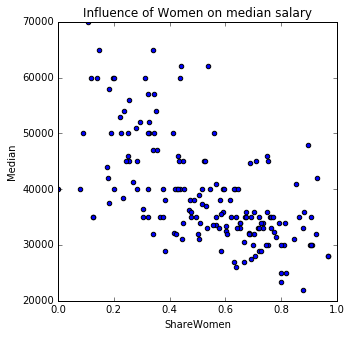

In [7]:
ax1 = recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Influence of Women on median salary', figsize=(5,5))
ax1.set_ylim(20000,70000)
ax1.set_xlim(0,1)

**Observation :** We can see a negative correlation between median salary and share of women. Thus, the more there are women in a major, the lower the salary of the students from these majors. We can make the hypothesis that this is due to the fact that the employers tend to pay a woman less than a man. 

### B) Is there any link between the share of full-time employees among the total and median salary?

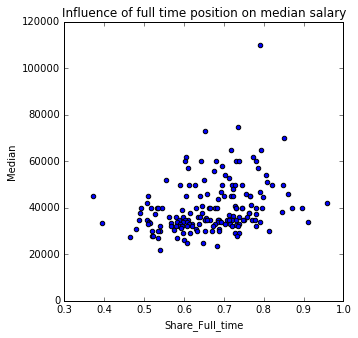

In [8]:
# Let's first calculate the share of full-time employees
recent_grads["Share_Full_time"] = recent_grads["Full_time"] / recent_grads["Total"]

ax2 = recent_grads.plot(x='Share_Full_time', y='Median', kind='scatter', title='Influence of full time position on median salary', figsize=(5,5))

**Observation :** Surprisingly, it seems that there is a very weak positive correlation between the share of full time employees and the median salary. We could have thunk that the more there are full time employees among the freshly graduates from a major, the higher the median salary of this major.

## 2) Using Histograms with Pandas to explore some questions

***

### A) What percent of majors are predominantly male? 

(50, 100)

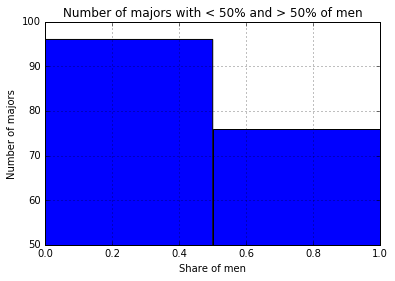

In [9]:
# Let's first calculate the share of male
recent_grads["ShareMen"] = 1 - recent_grads["ShareWomen"]

# Let's now see
ax3 = recent_grads['ShareMen'].hist(bins=2, range=(0,1))
ax3.set_title("Number of majors with < 50% and > 50% of men")
ax3.set_xlabel("Share of men")
ax3.set_ylabel("Number of majors")
ax3.set_ylim(50,100)

**Observation :** Visually, we notice quickly that there are more majors which are predominantly female than majors which are predominantly male.

### B) What's the most common median salary range?

(20000, 80000)

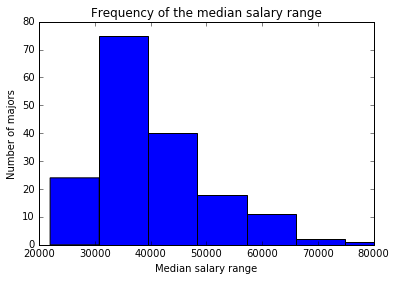

In [10]:
# To do an histogram, .plot() is less powerful than .hist() 
# Indeed, with .plot() we can not control the bins

ax4 = recent_grads['Median'].plot(kind='hist')
ax4.set_xlabel("Median salary range")
ax4.set_ylabel("Number of majors")
ax4.set_title("Frequency of the median salary range")
ax4.set_xlim(20000,80000)

**Observation :** Visually, it seems that the most common median salary range for the freshly graduates is between \$30,000 and \$40,000

## 3) Using Scatter Matrix Plot with Pandas to explore a correlation

### Is there a correlation between the median salary of full-time and the unemployment rate of a major ?

*This one is a [classic insiders vs. outsiders](https://en.wikipedia.org/wiki/Insider-outsider_theory_of_employment) economic analysis. We could expect that the more there are unemployed graduates (outsiders) in a major, the fewer the median salary of the full time (insiders). Indeed, in an economic contraction context, many outsiders would compete for a few full time position offers and would tend to accept a lower salary than expected.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5c8d056a0>,
      dtype=object)

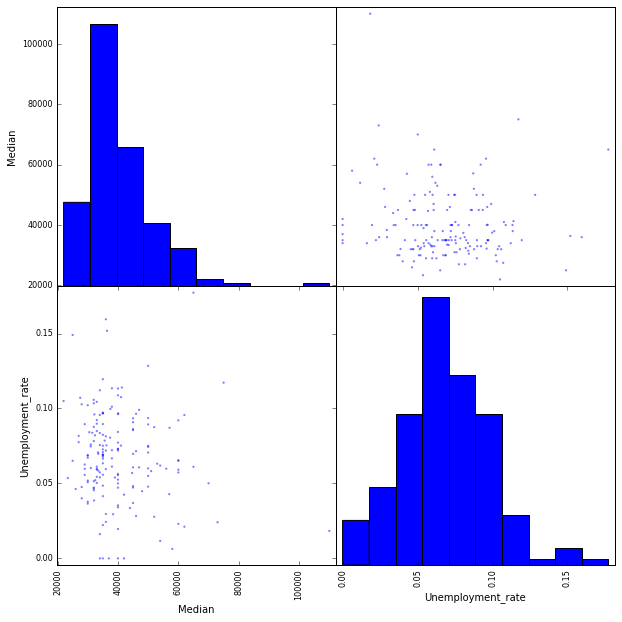

In [11]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Median', 'Unemployment_rate']], figsize=(10,10))

**Observation :** Visually, it seems that there is no correlation between median salary and unemployment rate (up-right and bottom-left plots). This is maybe due to the fact that the unemployment rate is low for roughly ~90% of the majors (bottom-right plot), and thus it does not have a real impact on the median salary for the insiders.

## 4) Using Bar Plots with Pandas to get examples confirming an hypothesis

When we answered the question *"Do students that majored in subjects that were majority female make more money?"*, we discovered a negative correlation between median salary and share of women.
We made the hypothesis that the employers tend to pay a woman less than a man.

Remember that the majors in our dataset are ordered by the column `Rank` which is the rank by median earnings. Thus, if we compare the share of women from the first 5 majors and the last 5 majors, we should have a significant negative correlation : the last 5 majors should have a greater share of women than the first 5.

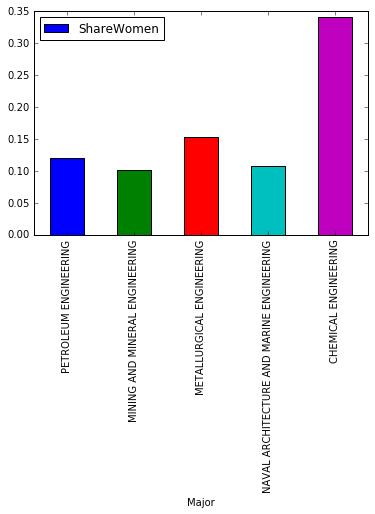

In [27]:
ax5 = recent_grads[:5].plot.bar(x='Major', y='ShareWomen')
ax5.legend(loc="upper left")

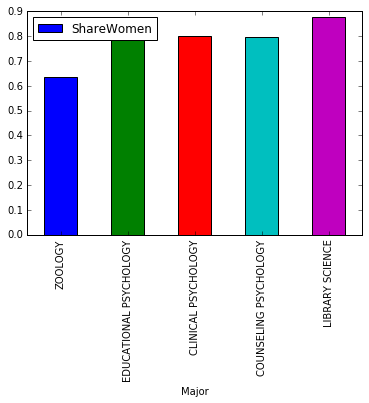

In [29]:
ax6 = recent_grads[-5:].plot.bar(x='Major', y='ShareWomen')

**Observation :** Visually, there is no doubt that the last 5 majors have a higher share of women than the first 5 majors.

**To go further :** To go further and study our hypothesis concerning the sexism of some employers, we could compare the salary between men and women among the **same** major, such as the Zoology one which is displayed above.

## Conclusion

In this project, we learned how to use the plotting tools built into pandas and from matplotlib to explore data on job outcomes. 

Here, the secret to perform well is to chose the right tool (scatter, histogram, bar plot, box plot etc) to answer the right problem  😉